# Assignment 1 - Linear Regression

### Linear Regression with One Variable

In [33]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline

In [34]:
data = pd.read_csv('data\ex1data1.txt', header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [35]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Population,97.0,8.159800,3.869884,5.0269,5.7077,6.5894,8.5781,22.203
Profit,97.0,5.839135,5.510262,-2.6807,1.9869,4.5623,7.0467,24.147


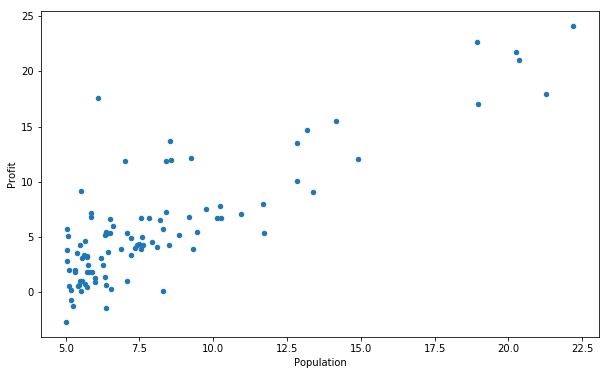

In [36]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(10,6)) 

Text(0.5,0,'Population of City in 10,000s')

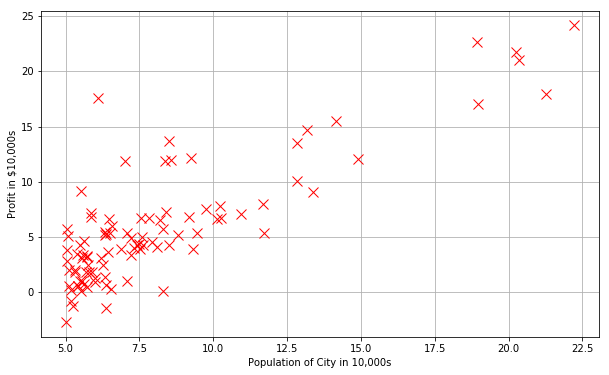

In [37]:
#Plot the data to see what it looks like
plt.figure(figsize=(10,6))
plt.plot(data.Population,data.Profit,'rx',markersize=10)
plt.grid(True) #Always plot.grid true!
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

In [38]:
def computeCost(X, y, theta):  
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [39]:
data.insert(0, 'Ones', 1)


In [40]:
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [41]:
cols = data.shape[1]  
X = data.iloc[:,0:cols-1]  
y = data.iloc[:,cols-1:cols]

In [42]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [43]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [44]:
X = np.matrix(X.values)  
y = np.matrix(y.values)  
theta = np.matrix(np.array([0,0]))  

In [45]:
theta

matrix([[0, 0]])

In [46]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [47]:
computeCost(X, y, theta)

32.072733877455676

In [48]:
def gradientDescent(X, y, theta, alpha, iters):  
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost

In [49]:
alpha = 0.01  
iters = 2000

In [50]:
g, cost = gradientDescent(X, y, theta, alpha, iters)  
g  

matrix([[-3.78806857,  1.18221277]])

In [51]:
computeCost(X, y, g)  

4.4780276098799705

Text(0.5,1,'Error vs. Training Epoch')

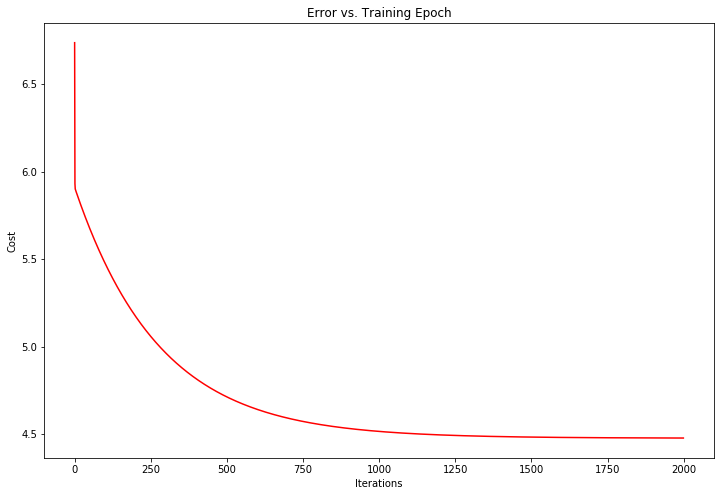

In [52]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch') 

### Linear Regression with Multiple Variable

In [53]:
data2 = pd.read_csv('data\ex1data2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [54]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [55]:
data2.insert(0, 'Ones', 1)

In [56]:
# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

0.13068648355046528

Text(0.5,1,'Error vs. Training Epoch')

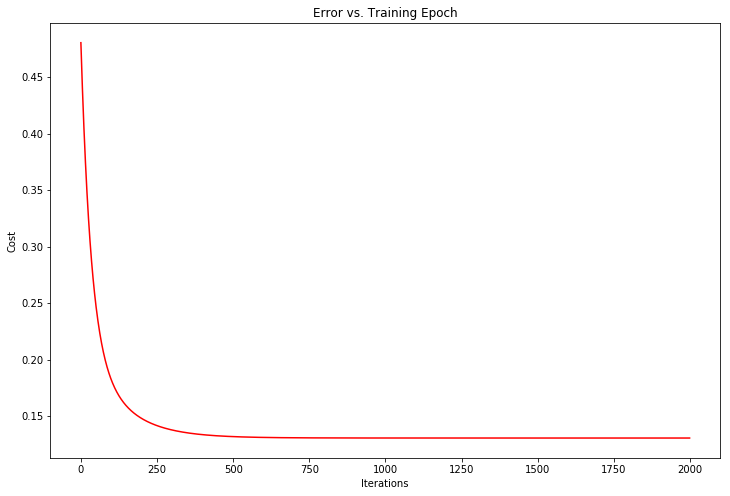

In [57]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost2, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch') 

## Done Simply Using SKLearn

In [62]:
from sklearn import linear_model  
model = linear_model.LinearRegression()  
model.fit(X, y)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0.5,1,'Predicted Profit vs. Population Size')

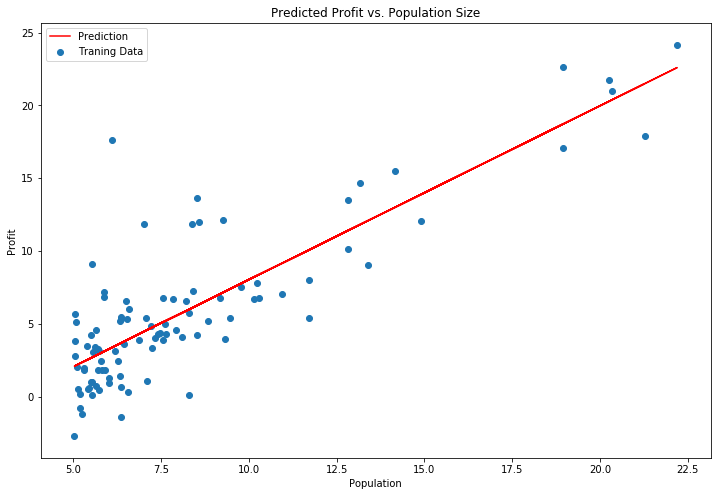

In [63]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')